In [ ]:
# from google.colab import drive
# drive.mount ('/content/drive/')

Mounted at /content/drive/


#📚 Library

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import cumfreq, t
from statsmodels.distributions.empirical_distribution import ECDF

# 🎲 Data base

In [ ]:
df_path = '/dataset/dataset_nft_collections.csv'
df = pd.read_csv(df_path)
df = df.drop(['count'], axis=1)
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427788 entries, 0 to 427787
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   total_volume   427788 non-null  float64
 1   total_sales    427788 non-null  float64
 2   total_supply   427788 non-null  float64
 3   num_owners     427788 non-null  int64  
 4   average_price  427788 non-null  float64
 5   num_reports    427788 non-null  int64  
 6   market_cap     427788 non-null  float64
 7   floor_price    427788 non-null  float64
 8   category       427788 non-null  object 
 9   qtd_traits     427788 non-null  int64  
 10  qtd_editors    427788 non-null  int64  
 11  name_json      427788 non-null  object 
 12  slug           427788 non-null  object 
dtypes: float64(6), int64(4), object(3)
memory usage: 42.4+ MB


In [ ]:
df.describe()

,total_volume,total_sales,total_supply,num_owners,average_price,num_reports,market_cap,floor_price,qtd_traits,qtd_editors
count,427788.000000,4.277880e+05,4.277880e+05,4.277880e+05,4.277880e+05,427788.000000,427788.000000,4.277880e+05,427788.000000,427788.000000
mean,8.663215,1.416060e+11,2.659265e+02,8.586781e+01,2.340873e+09,0.010776,2.446618,1.659843e+09,1.421856,1.036628
std,1016.935309,9.101152e+13,1.691232e+04,5.347439e+03,1.531060e+12,1.092297,278.194950,3.825509e+11,7.006031,0.482295
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000
50%,0.000000,0.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000
75%,0.000000,0.000000e+00,1.300000e+01,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000
max,613418.506984,5.952044e+16,9.707989e+06,1.641123e+06,1.001397e+15,700.000000,154168.124094,1.000000e+14,998.000000,92.000000


**Quantidade e nome dos atributos a serem utilizados na análise**

In [ ]:
df_atrib = df.drop(['category', 'name_json', 'slug'], axis=1)
print("Quantidade de atributos:", len(df_atrib.columns))
print("Nomes dos atributos:")
for item in df_atrib.columns:
  print("*", item)

Quantidade de atributos: 10
Nomes dos atributos:
* total_volume
* total_sales
* total_supply
* num_owners
* average_price
* num_reports
* market_cap
* floor_price
* qtd_traits
* qtd_editors


# ✍🏼 Análises

## ✍🏼  Inconsistências da base ?

In [ ]:
df[(df['total_supply'] == 0) & (df['total_sales'] > 0)]   ## Quem são?

,total_volume,total_sales,total_supply,num_owners,average_price,num_reports,market_cap,floor_price,category,qtd_traits,qtd_editors,name_json,slug
21781,0.010000,1.0,0.0,0,0.010000,0,0.0,0.0,pfps,0,1,collectionjson119672.json,girls-club-presale
223398,0.069000,1.0,0.0,0,0.069000,0,0.0,0.0,art,0,1,collectionjson302046.json,tender-ab
243681,9.934103,23.0,0.0,0,0.431918,0,0.0,0.0,virtual-worlds,3,1,collectionjson320387.json,the-sandbox-k-verse-hallyu-rising-land-sale


In [ ]:
df[(df['total_supply'] == 0) & (df['qtd_traits'] > 5) ]   ## Quem são?

,total_volume,total_sales,total_supply,num_owners,average_price,num_reports,market_cap,floor_price,category,qtd_traits,qtd_editors,name_json,slug
201,0.0,0.0,0.0,0,0.0,0,0.0,0.0,art,12,1,collectionjson100178.json,heroes-of-the-homeland
275,0.0,0.0,0.0,0,0.0,0,0.0,0.0,art,9,1,collectionjson100245.json,nazaninnodernart
781,0.0,0.0,0.0,0,0.0,0,0.0,0.0,virtual-worlds,7,1,collectionjson100706.json,ai-work-2
1771,0.0,0.0,0.0,0,0.0,0,0.0,0.0,art,8,1,collectionjson10160.json,abstractforus
2299,0.0,0.0,0.0,0,0.0,0,0.0,0.0,pfps,6,2,collectionjson102075.json,rekt-wolf-bnb
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419148,0.0,0.0,0.0,0,0.0,0,0.0,0.0,art,6,1,collectionjson9220.json,legacyofart
419551,0.0,0.0,0.0,0,0.0,0,0.0,0.0,pfps,11,1,collectionjson92566.json,neytiriavatar
421515,0.0,0.0,0.0,0,0.0,0,0.0,0.0,art,12,1,collectionjson94338.json,tldb-cyberpunk3d
424116,0.0,0.0,0.0,0,0.0,0,0.0,0.0,pfps,23,1,collectionjson96685.json,f-ai


In [ ]:
df[(df['total_supply'] == 0) & (df['qtd_traits'] > 5)].describe()

,total_volume,total_sales,total_supply,num_owners,average_price,num_reports,market_cap,floor_price,qtd_traits,qtd_editors
count,463.0,463.0,463.0,463.0,463.0,463.0,463.0,463.000000,463.000000,463.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.172866,15.006479,1.084233
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.339684,35.450135,0.415383
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.000000,1.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,7.000000,1.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9.000000,1.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,14.000000,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1317.384000,676.000000,7.000000


In [ ]:
df_zeros3 = df[ (df['total_volume'] == 0) & (df['total_sales'] == 0) & (df['total_supply'] == 0)  & (df['num_owners'] == 0) & (df['average_price'] == 0)  & (df['num_reports'] == 0) & (df['market_cap'] == 0) & (df['floor_price'] == 0) ]
df_zeros3.describe()

,total_volume,total_sales,total_supply,num_owners,average_price,num_reports,market_cap,floor_price,qtd_traits,qtd_editors
count,103621.0,103621.0,103621.0,103621.0,103621.0,103621.0,103621.0,103621.0,103621.000000,103621.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074232,1.005568
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.361727,0.099205
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,676.000000,13.000000


In [ ]:
category_counts = df_zeros3[ 'category'].value_counts()
category_percentage = (category_counts / len(df_zeros3)) * 100

result_df = pd.DataFrame({'Contagem': category_counts, 'Porcentagem': category_percentage})
print(result_df)

                     Contagem  Porcentagem
category                                  
music                   32317    31.187694
art                     30939    29.857847
virtual-worlds          11254    10.860733
gaming                  11007    10.622364
memberships              6097     5.883942
photography              5793     5.590566
pfps                     3834     3.700022
sports-collectibles      1692     1.632874
domain-names              688     0.663958


## 📈 CDF todas as classes

In [ ]:
### TODO

## 📈 CDF art, no-art

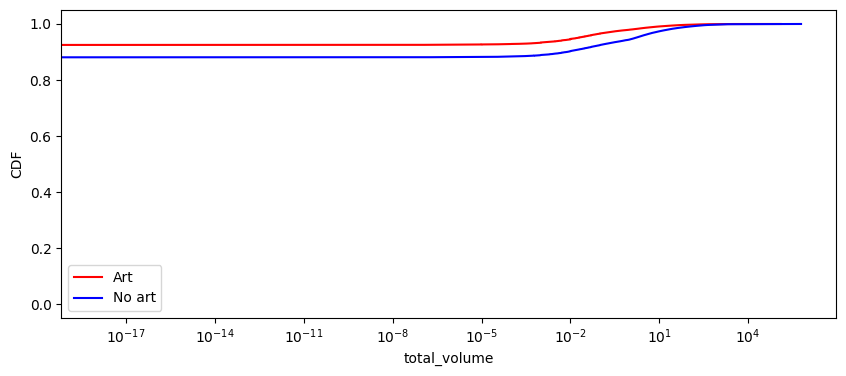

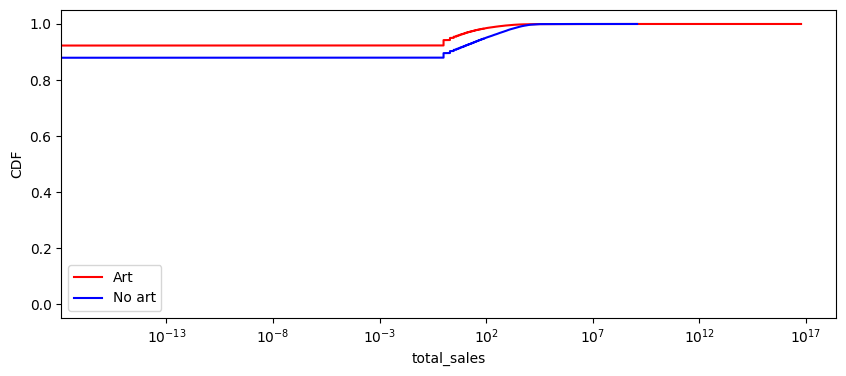

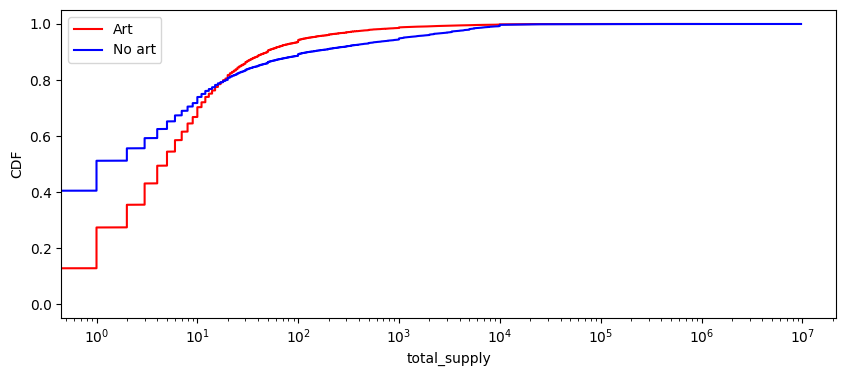

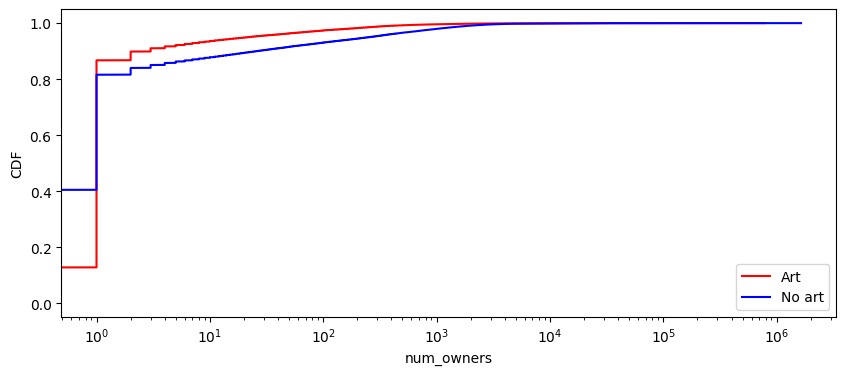

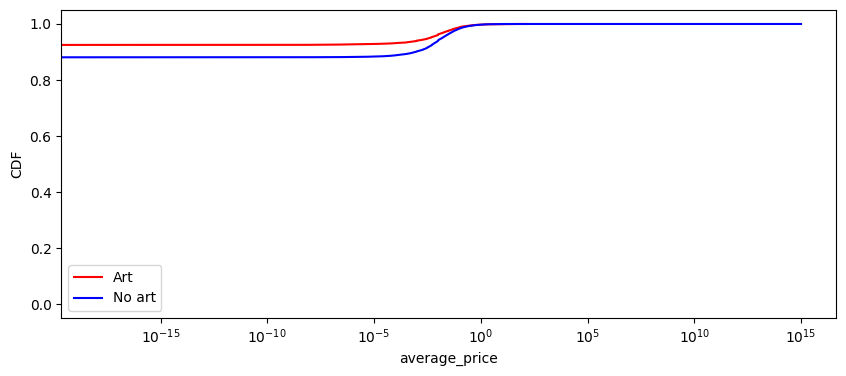

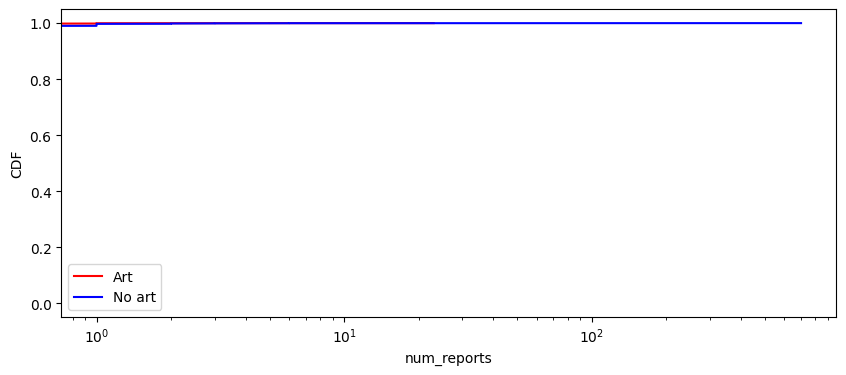

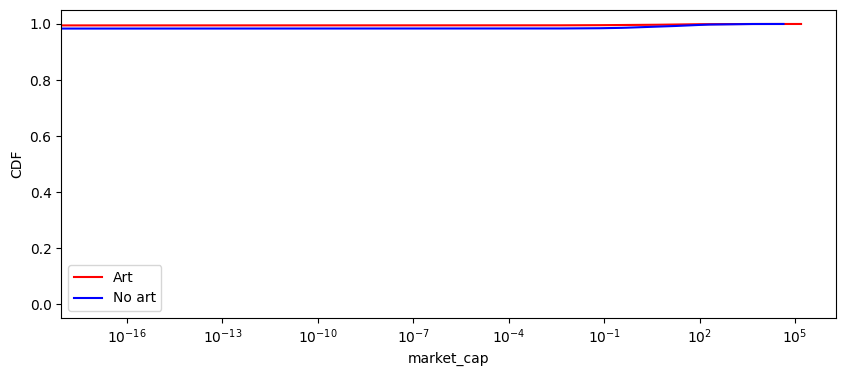

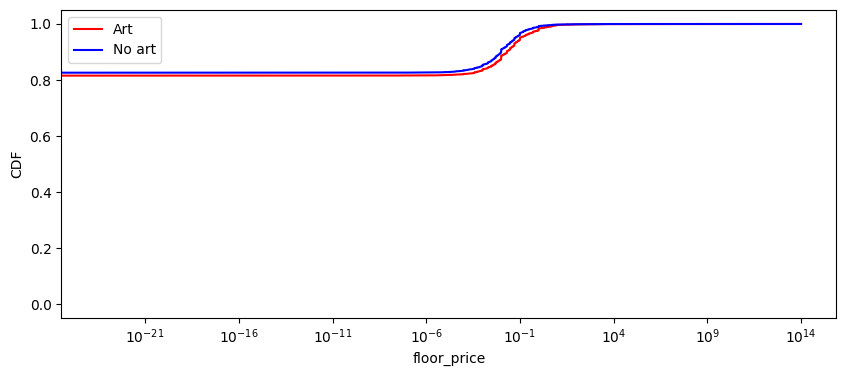

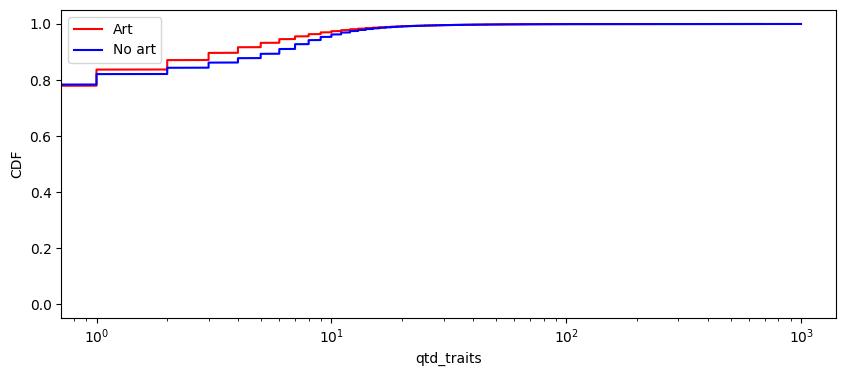

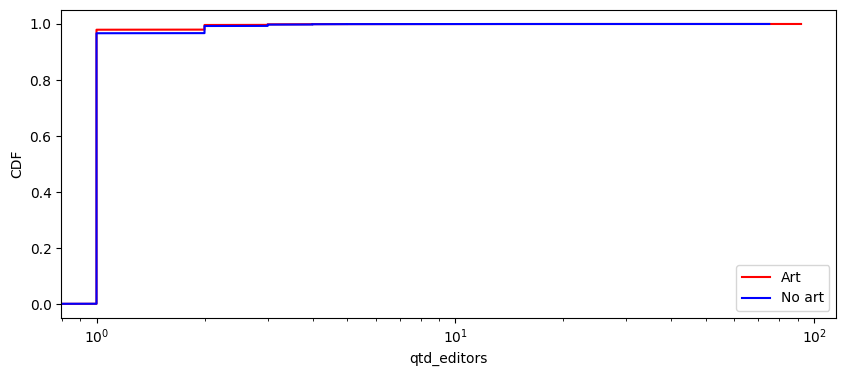

In [ ]:
for column in df_atrib.columns:

    cdf_art = ECDF(df.loc[df['category']=='art',column].dropna())
    cdf_noart = ECDF(df.loc[df['category']!='art',column].dropna())

    plt.figure(figsize=(10, 4))
    plt.plot(cdf_art.x, cdf_art.y, color="red", label="Art")
    plt.plot(cdf_noart.x, cdf_noart.y, color="blue", label="No art")
    plt.xlabel(column)
    plt.ylabel('CDF')
    plt.legend()
    plt.xscale('log')
    plt.show()

## 📈 CDF art, pfps, outros

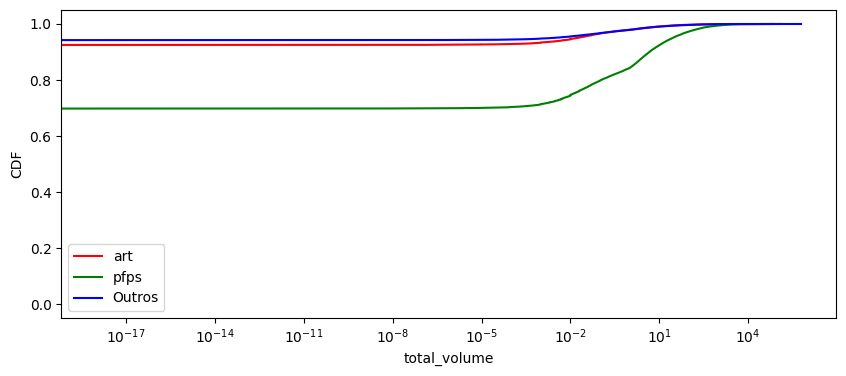

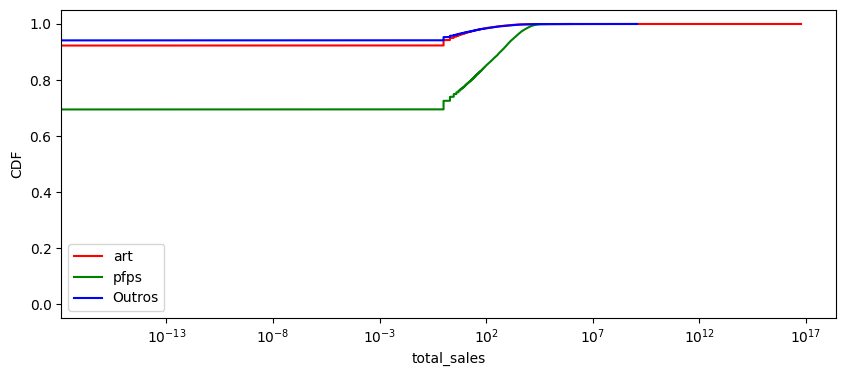

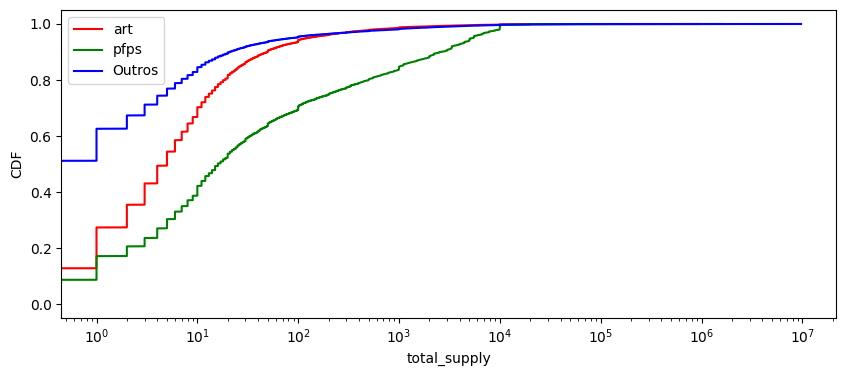

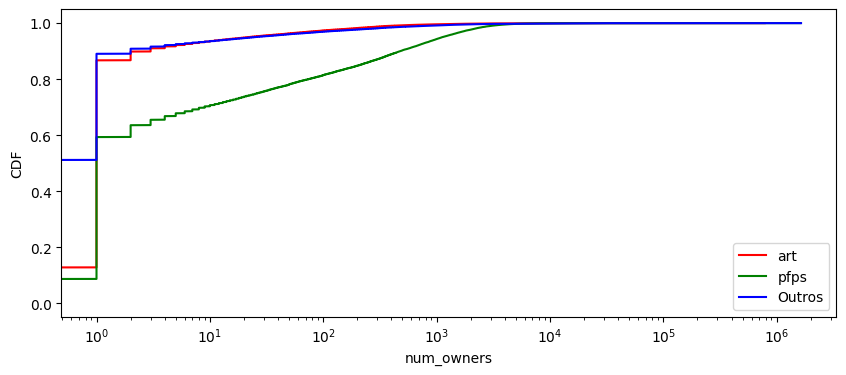

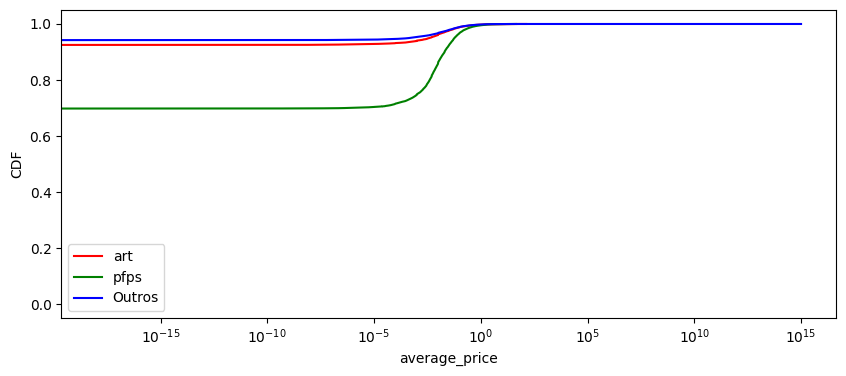

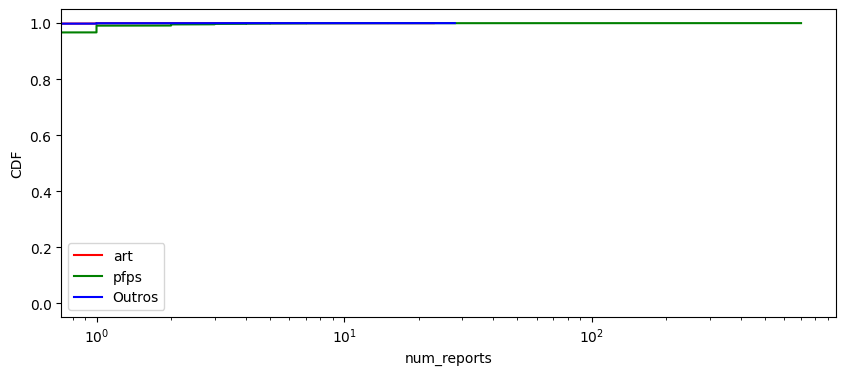

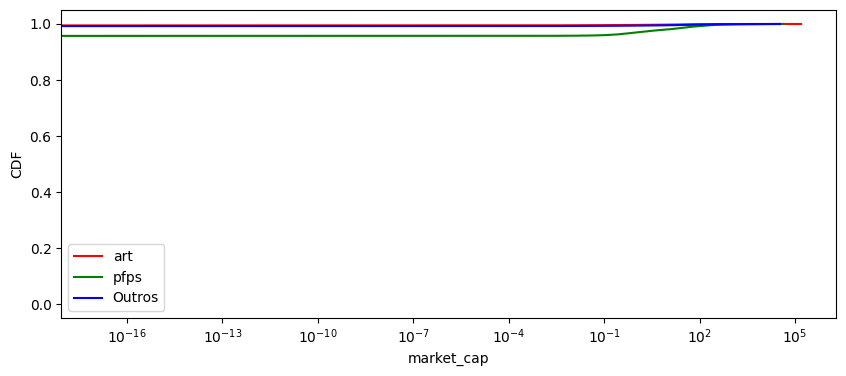

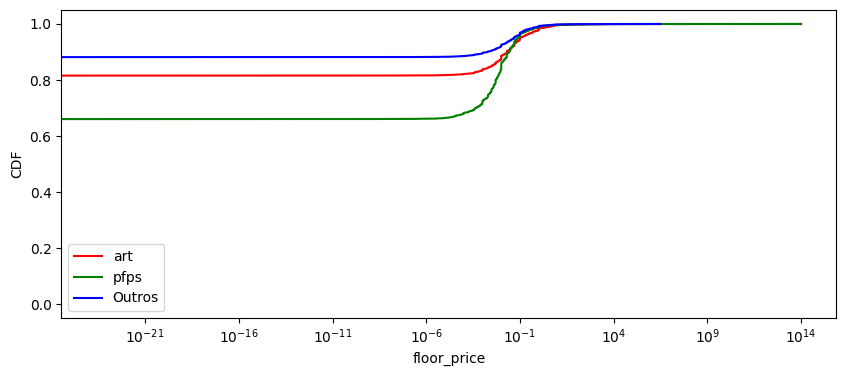

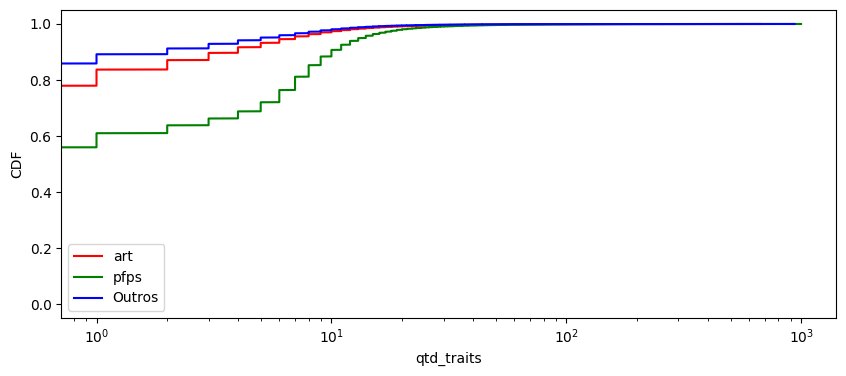

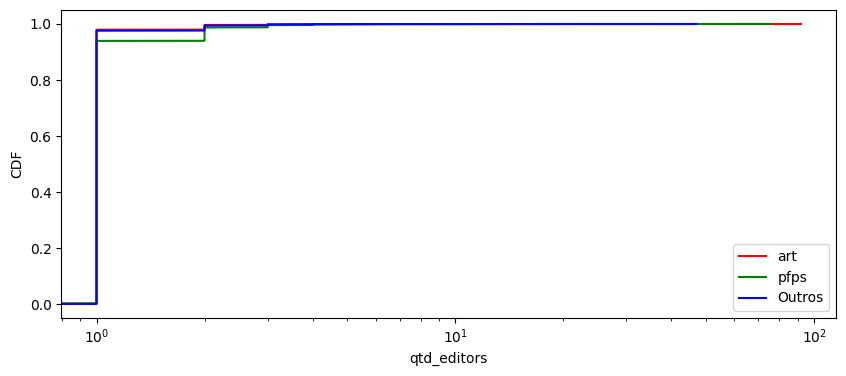

In [ ]:
for column in df_atrib.columns:

    cdf_art = ECDF(df.loc[df['category']=='art',column].dropna())
    cdf_pfp = ECDF(df.loc[df['category']=='pfps',column].dropna())
    cdf_outros = ECDF(df.loc[(df['category']!='art') & (df['category']!='pfps'),column].dropna())

    plt.figure(figsize=(10, 4))
    plt.plot(cdf_art.x, cdf_art.y, color="red", label="art")
    plt.plot(cdf_pfp.x, cdf_pfp.y, color="green", label="pfps")
    plt.plot(cdf_outros.x, cdf_outros.y, color="blue", label="Outros")
    plt.xlabel(column)
    plt.ylabel('CDF')
    plt.legend()
    plt.xscale('log')
    plt.show()

## 📈 Média todas as classes

total_volume - ########


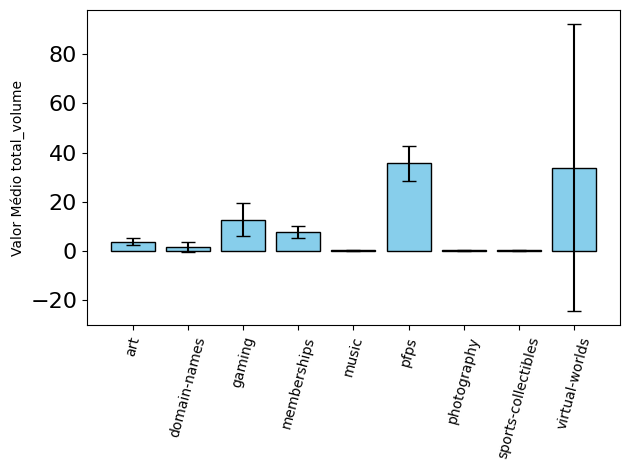


total_sales - ########


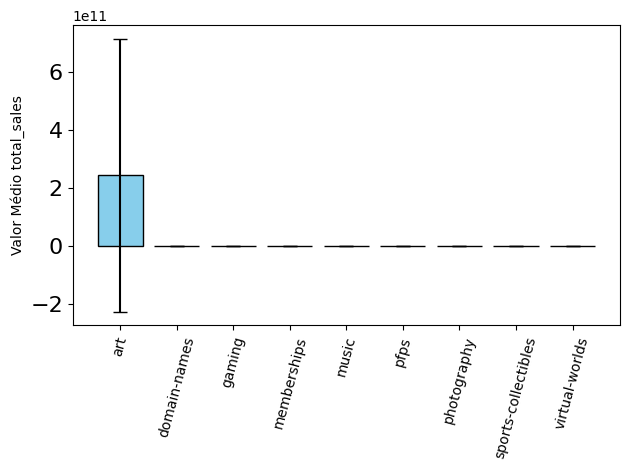


total_supply - ########


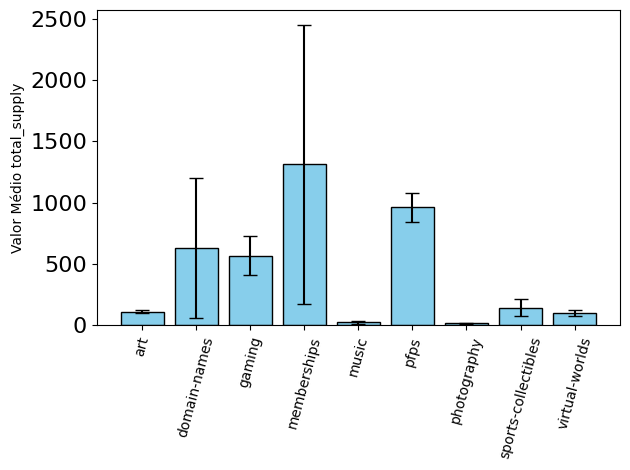


num_owners - ########


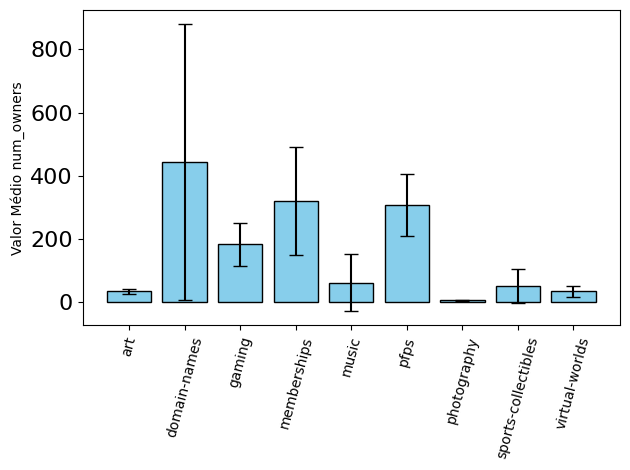


average_price - ########


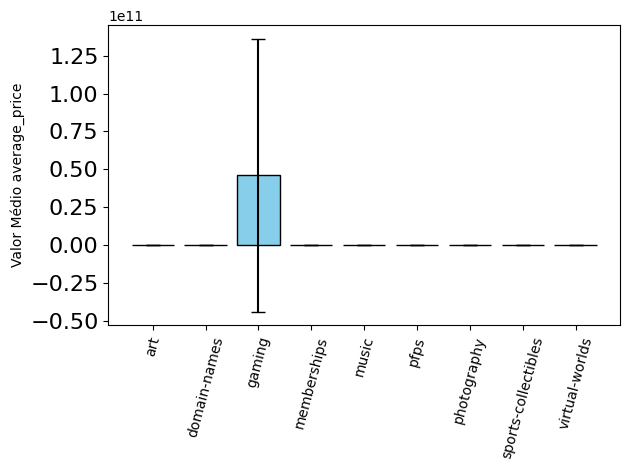


num_reports - ########


/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


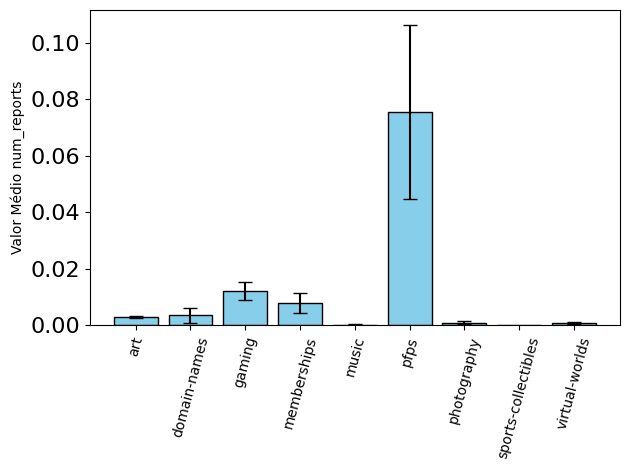


market_cap - ########


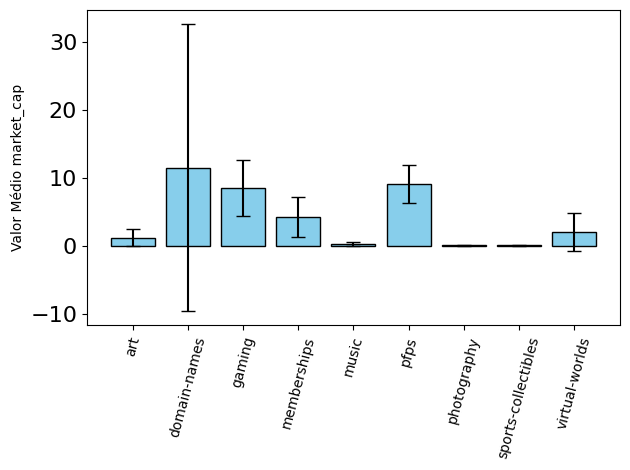


floor_price - ########


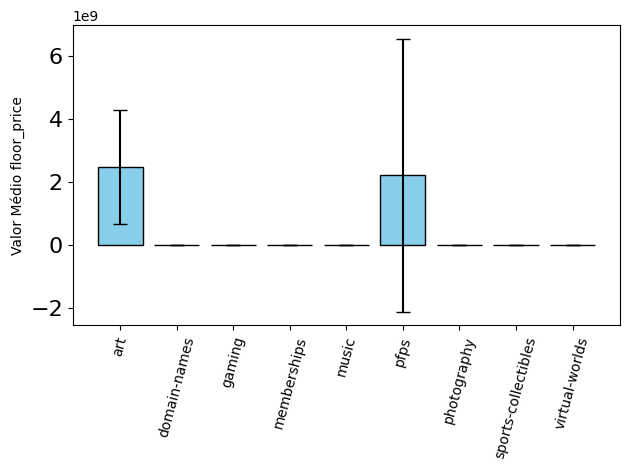


qtd_traits - ########


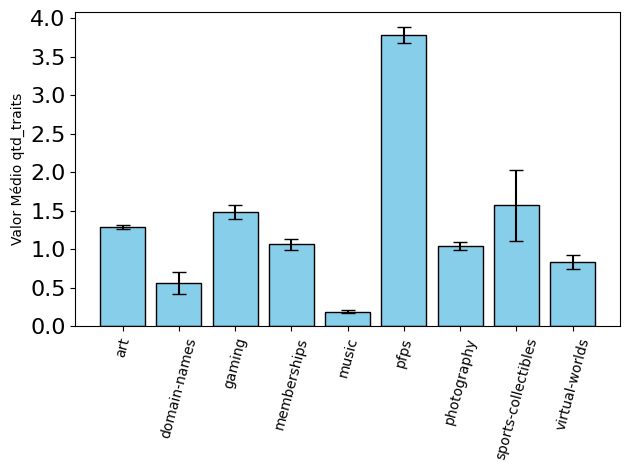


qtd_editors - ########


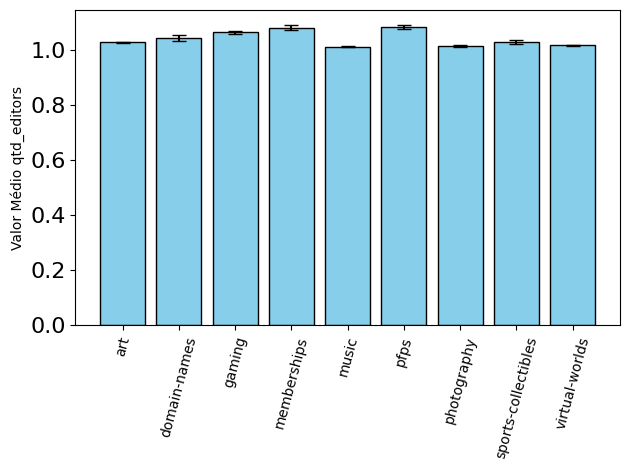

In [ ]:
fontsize=16
for column in df.describe().columns:
    print(column, "- ########")

    df_ = df.groupby("category")[str(column)].describe().reset_index().set_index("category")

    # Cálculo do intervalo de confiança de 95%
    df_['ci_lower'], df_['ci_upper'] = zip(*df_.apply(lambda row: t.interval(0.95, row['count'] - 1, loc=row['mean'], scale=row['std'] / (row['count'] ** 0.5)), axis=1))

    # Criação do gráfico de barras
    fig, ax = plt.subplots()
    ax.bar(df_.index, df_['mean'], yerr=(df_['ci_upper'] - df_['mean']), capsize=5, color='skyblue', edgecolor='black')

    # bars = ax.bar(df_.index, df_['mean'], yerr=(df_['ci_upper'] - df_['mean']), capsize=5, color='skyblue', edgecolor='black')
    # for bar, ci_lower, ci_upper in zip(bars, df_['ci_lower'], df_['ci_upper']):
    #    ax.text(bar.get_x() + bar.get_width() / 2 - 0.1, ci_upper + 1, f'CI: ({ci_lower:.2f}, {ci_upper:.2f})', ha='center', color='black')

    # Adição de rótulos e título
    ax.set_ylabel('Valor Médio '+column,fontsize = 10)
    # ax.set_xlabel('Categoria',fontsize = fontsize)
    #ax.set_title(str(column) + '\nValores Médios por Categoria com Barra de Erro (95% de Confiança)')

    # Exibição do gráfico
    plt.xticks(rotation=75, ha='center',fontsize = 10)
    plt.yticks(fontsize = fontsize)
    plt.tight_layout()
    # plt.savefig('/content/drive/MyDrive/ethereum/graficos/avg_sbrc24/avg_'+str(column)+'.pdf')
    plt.show()
    print("")



total_volume - ########


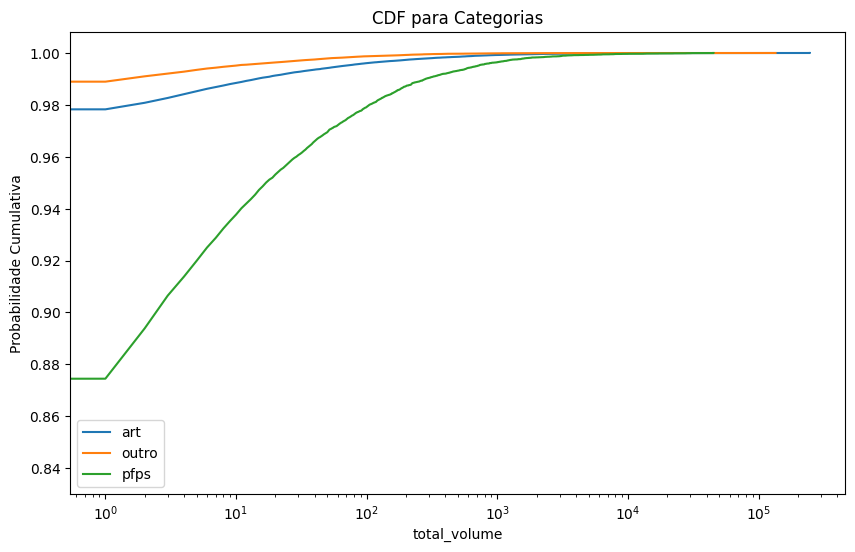

total_sales - ########


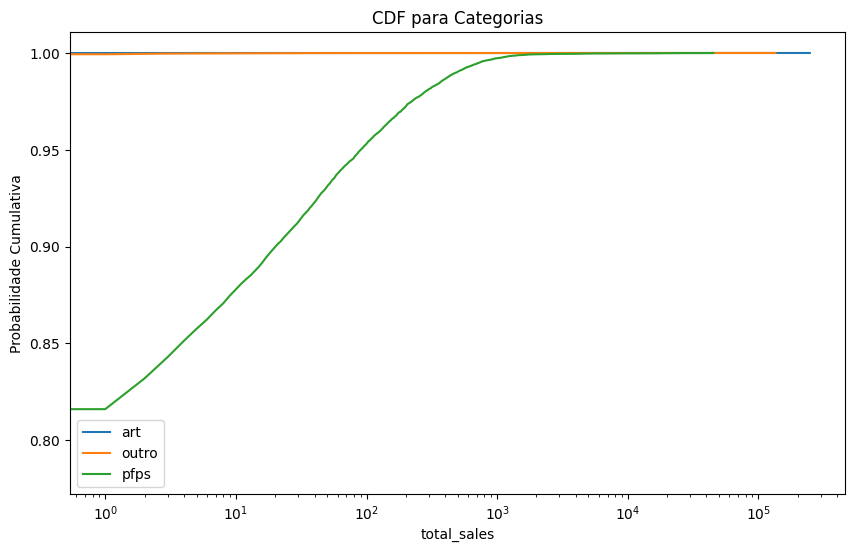

total_supply - ########


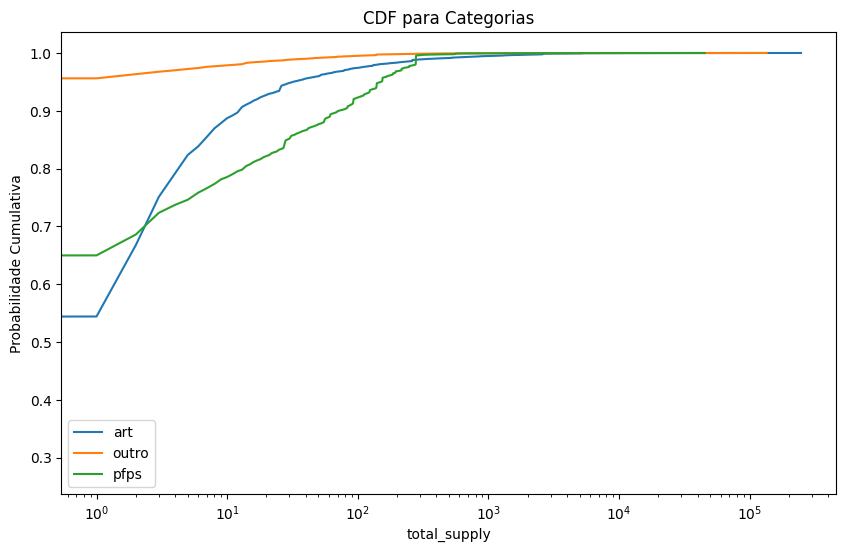

num_owners - ########


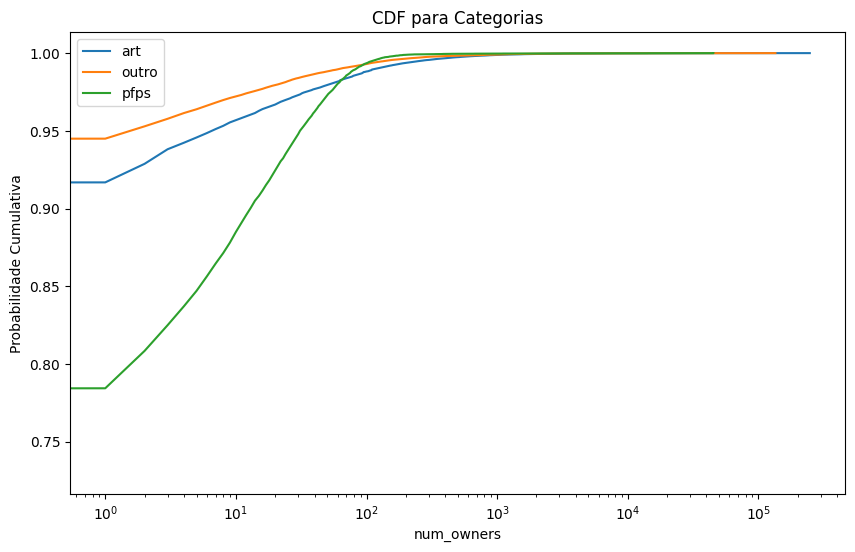

average_price - ########


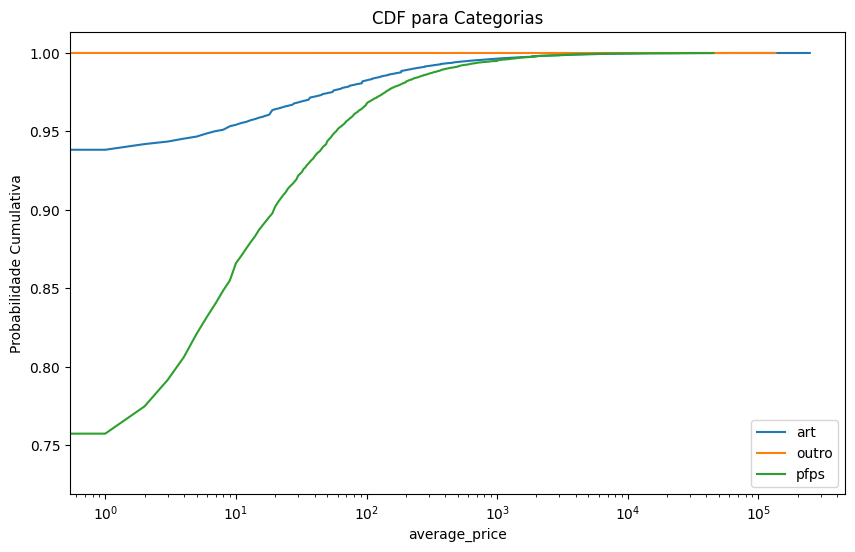

num_reports - ########


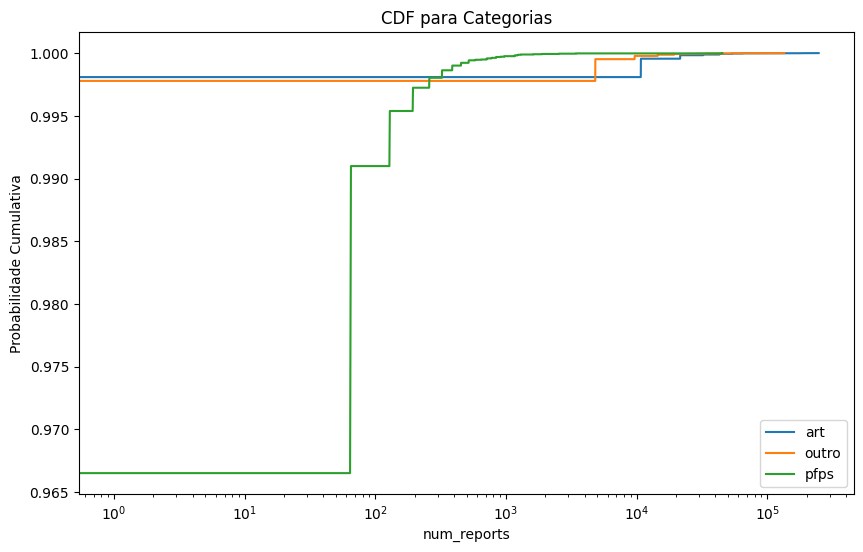

market_cap - ########


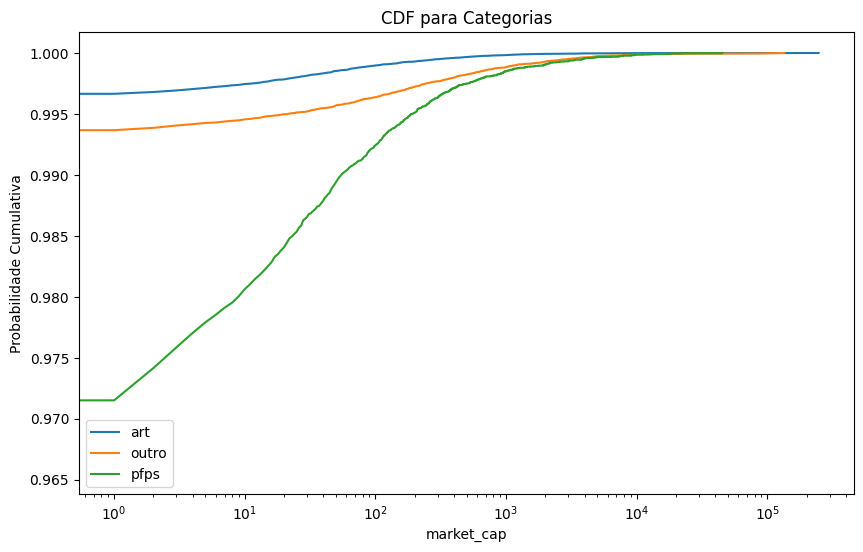

floor_price - ########


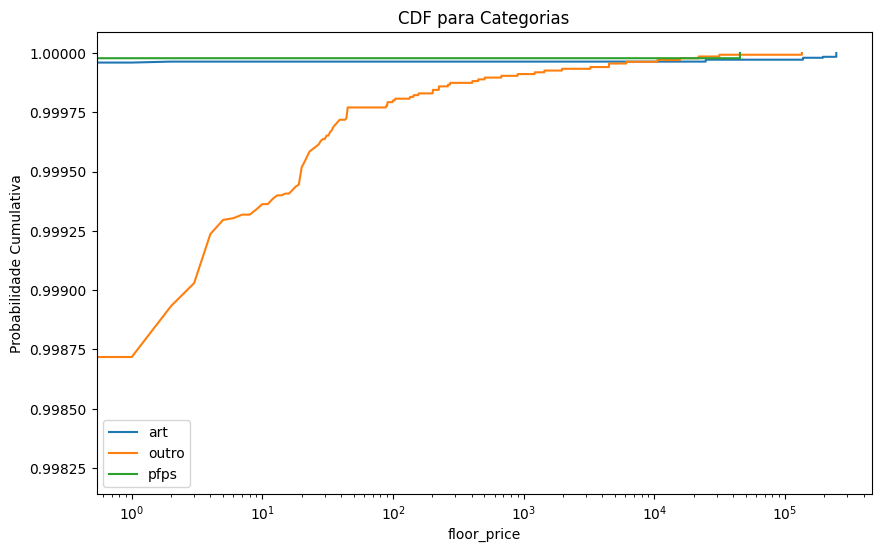

qtd_traits - ########


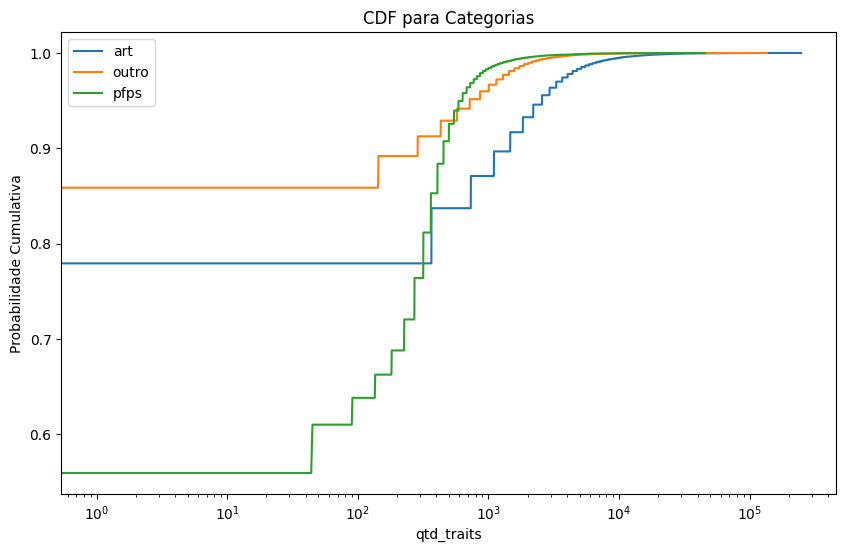

qtd_editors - ########


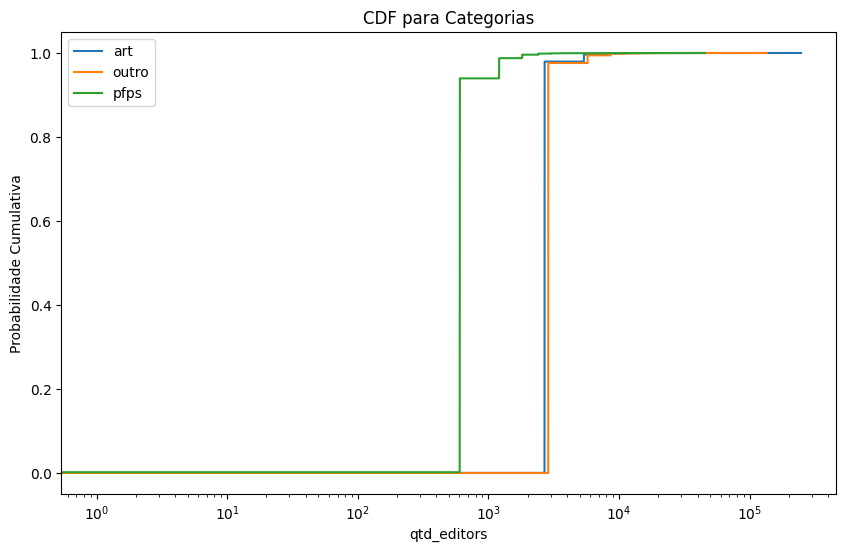

In [ ]:
for column in df.describe().columns:
    print(column, "- ########")
    #df_ = df[(df['total_sales'] > 0) & (df['total_supply'] > 0)]
    df_ = df.copy()
    df_["category"] = df_["category"].replace(['sports-collectibles', 'photography','gaming',
              'music', 'virtual-worlds', 'memberships', 'domain-names'], 'outro')
    df_ = df_[[str(column), 'category']]

    #df_[str(column)] = np.log1p(df_[str(column)])

    # Categorias desejadas
    categories = df_['category'].unique()

    # Configurações do gráfico
    plt.figure(figsize=(10, 6))
    plt.title('CDF para Categorias')
    plt.xlabel(str(column))
    plt.ylabel('Probabilidade Cumulativa')

    # Iteração sobre as categorias
    for category in categories:
        data = df_[df_['category'] == category][str(column)]
        data_sorted = np.sort(data)
        cdf = cumfreq(data_sorted, numbins=len(data_sorted))

        # Normaliza a frequência acumulada para obter probabilidades cumulativas
        cdf = cdf.cumcount / cdf.cumcount[-1]

        # Plota a CDF para cada categoria
        plt.plot(cdf, label=category)
        #plt.plot(data_sorted, cdf, label=category)

    # Aplica escala logarítmica no eixo y
    plt.xscale('log')

    # Adiciona legenda
    plt.legend()

    # Exibe o gráfico
    plt.show()



## 📈 Média art, pfp e outros

total_volume - ########


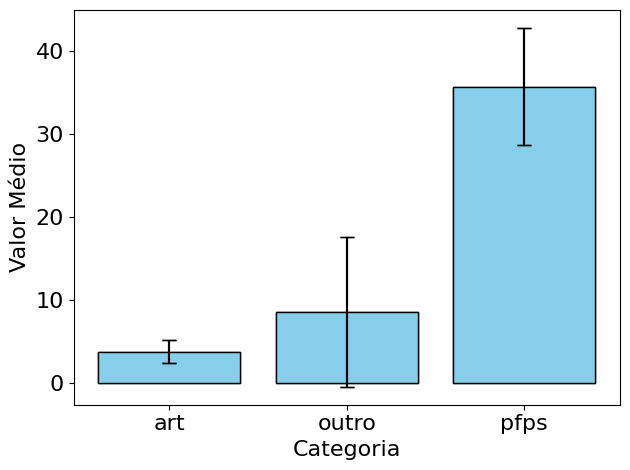


total_sales - ########


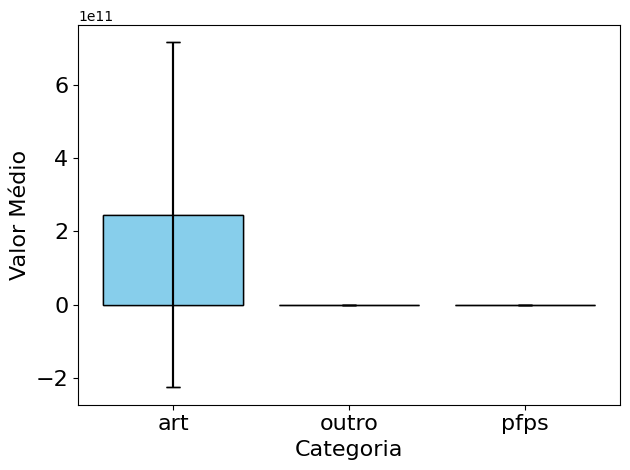


total_supply - ########


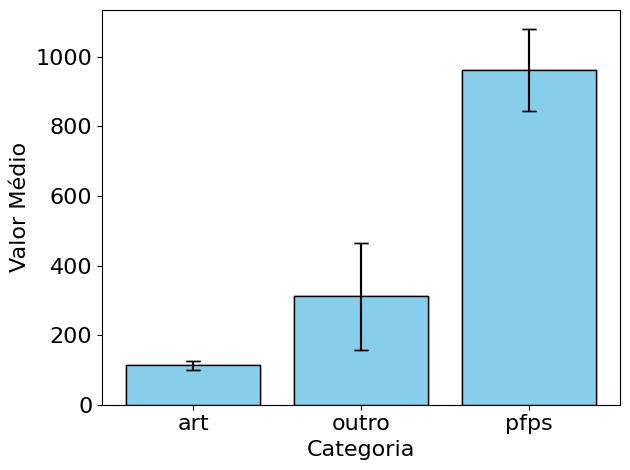


num_owners - ########


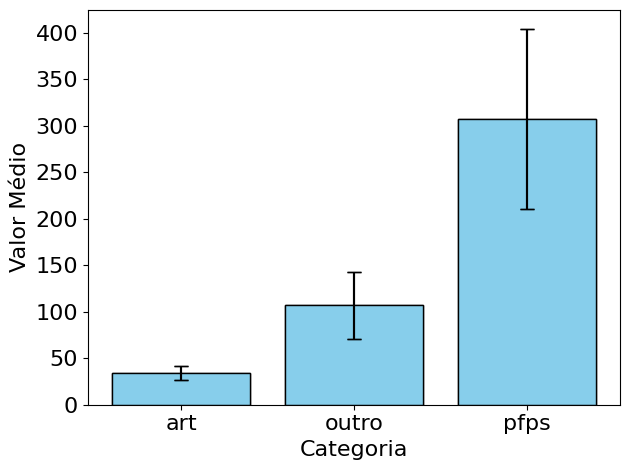


average_price - ########


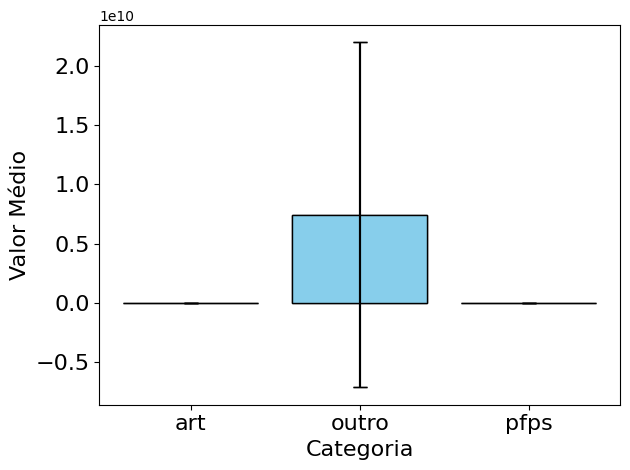


num_reports - ########


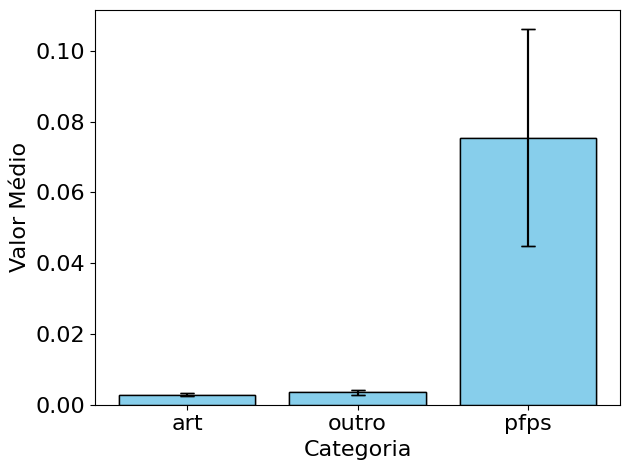


market_cap - ########


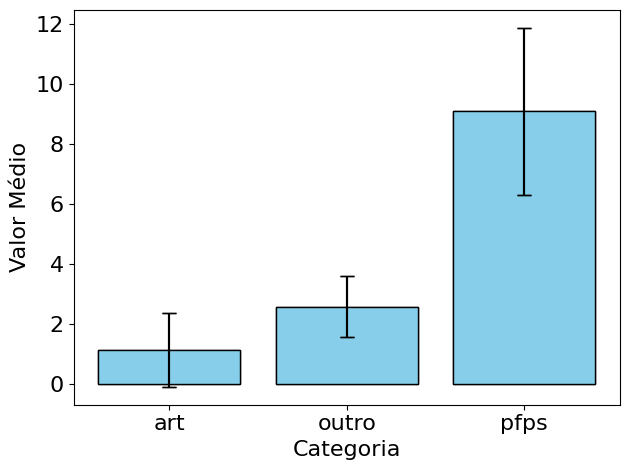


floor_price - ########


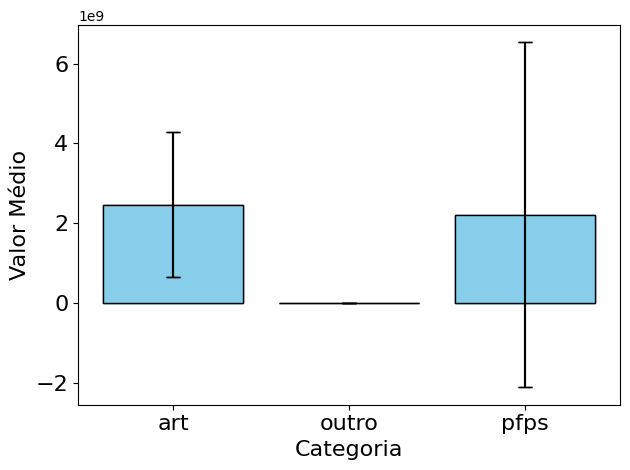


qtd_traits - ########


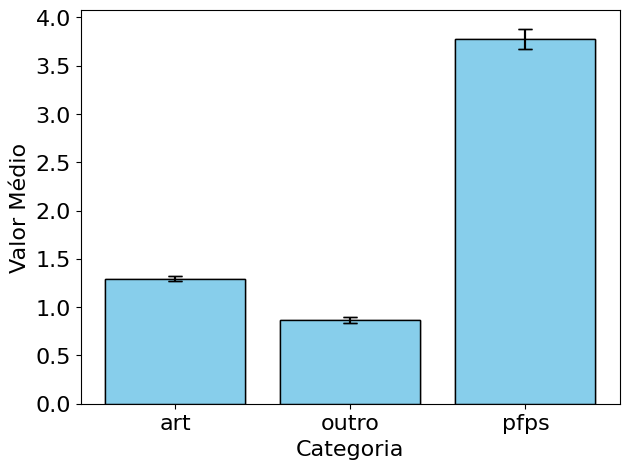


qtd_editors - ########


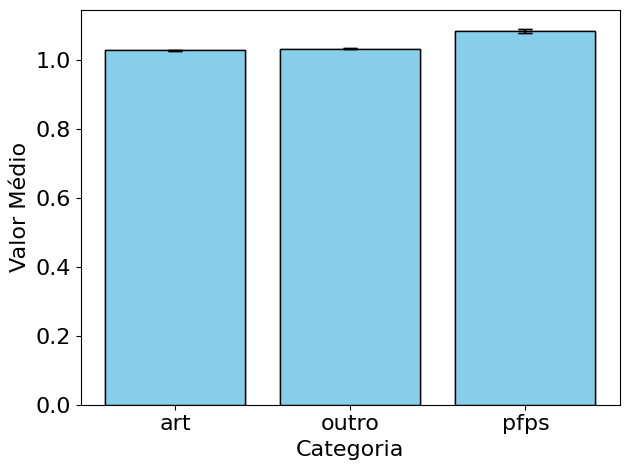

In [ ]:
fontsize=16
for column in df.describe().columns:
    print(column, "- ########")
    df_ = df.copy()
    df_["category"] = df_["category"].replace(['sports-collectibles', 'photography','gaming',
          'music', 'virtual-worlds', 'memberships', 'domain-names'], 'outro')

    df_ = df_.groupby("category")[str(column)].describe().reset_index().set_index("category")


    # Cálculo do intervalo de confiança de 95%
    df_['ci_lower'], df_['ci_upper'] = zip(*df_.apply(lambda row: t.interval(0.95, row['count'] - 1, loc=row['mean'], scale=row['std'] / (row['count'] ** 0.5)), axis=1))

    # Criação do gráfico de barras
    fig, ax = plt.subplots()
    ax.bar(df_.index, df_['mean'], yerr=(df_['ci_upper'] - df_['mean']), capsize=5, color='skyblue', edgecolor='black')

    bars = ax.bar(df_.index, df_['mean'], yerr=(df_['ci_upper'] - df_['mean']), capsize=5, color='skyblue', edgecolor='black')

    #for bar, ci_lower, ci_upper in zip(bars, df_['ci_lower'], df_['ci_upper']):
    #    ax.text(bar.get_x() + bar.get_width() / 2 - 0.1, ci_upper + 1, f'CI: ({ci_lower:.2f}, {ci_upper:.2f})', ha='center', color='black')

    # Adição de rótulos e título
    ax.set_ylabel('Valor Médio',fontsize = fontsize)
    ax.set_xlabel('Categoria',fontsize = fontsize)
    #ax.set_title(str(column) + '\nValores Médios por Categoria com Barra de Erro (95% de Confiança)')

    # Exibição do gráfico
    plt.xticks(rotation=0, ha='center',fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.tight_layout()
    # plt.savefig('/content/drive/MyDrive/ethereum/graficos/cdf_sbrc24/CDF_'+str(column)+'.pdf')
    plt.show()
    print("")



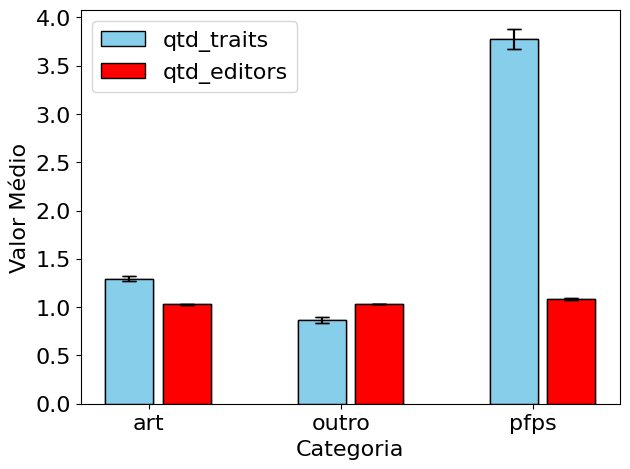

In [ ]:
bar_width = 0.25
bar_spacing = 0.2
fig, ax = plt.subplots()

fontsize = 16

#qtd_traits
df_ = df.copy()
df_["category"] = df_["category"].replace(['sports-collectibles', 'photography','gaming',
      'music', 'virtual-worlds', 'memberships', 'domain-names'], 'outro')
df_ = df_.groupby("category")['qtd_traits'].describe().reset_index().set_index("category")
df_['ci_lower'], df_['ci_upper'] = zip(*df_.apply(lambda row: t.interval(0.95, row['count'] - 1, loc=row['mean'], scale=row['std'] / (row['count'] ** 0.5)), axis=1))

ax.bar(np.arange(len(df_.index)) - bar_spacing/2, df_['mean'], width=bar_width,
       yerr=(df_['ci_upper'] - df_['mean']),
       capsize=5, color='skyblue', edgecolor='black', label='qtd_traits')
bars = ax.bar(np.arange(len(df_.index)) - bar_spacing/2, df_['mean'],  width=bar_width, yerr=(df_['ci_upper'] - df_['mean']),
              capsize=5, color='skyblue', edgecolor='black')

#qtd_editors
df_ = df.copy()
df_["category"] = df_["category"].replace(['sports-collectibles', 'photography','gaming',
      'music', 'virtual-worlds', 'memberships', 'domain-names'], 'outro')

df_ = df_.groupby("category")['qtd_editors'].describe().reset_index().set_index("category")
df_['ci_lower'], df_['ci_upper'] = zip(*df_.apply(lambda row: t.interval(0.95, row['count'] - 1, loc=row['mean'], scale=row['std'] / (row['count'] ** 0.5)), axis=1))

ax.bar(np.arange(len(df_.index)) + bar_spacing/2 + bar_spacing/2, df_['mean'], width=bar_width,
       yerr=(df_['ci_upper'] - df_['mean']),
       capsize=5, color='red', edgecolor='black', label='qtd_editors')
bars = ax.bar(np.arange(len(df_.index)) + bar_spacing/2 + bar_spacing/2, df_['mean'],  width=bar_width, yerr=(df_['ci_upper'] - df_['mean']),
              capsize=5, color='red', edgecolor='black')


# Adição de rótulos e título
ax.set_ylabel('Valor Médio',fontsize = fontsize)
ax.set_xlabel('Categoria',fontsize = fontsize)

ax.set_xticks(np.arange(len(df_.index)))
ax.set_xticklabels(df_.index)
ax.legend(fontsize=16)
#ax.set_title(str(column) + '\nValores Médios por Categoria com Barra de Erro (95% de Confiança)')

# Exibição do gráfico
plt.xticks(rotation=0, ha='center', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ethereum/graficos/cdf_sbrc24/CDF_editors_traits.pdf')
plt.show()
print("")

In [ ]:
df_

,count,mean,std,min,25%,50%,75%,max,ci_lower,ci_upper
category,,,,,,,,,,
art,247507.0,1.029466,0.514102,0.0,1.0,1.0,1.0,92.0,1.027440,1.031491
outro,134983.0,1.033375,0.294244,0.0,1.0,1.0,1.0,47.0,1.031805,1.034944
pfps,45298.0,1.085456,0.701365,0.0,1.0,1.0,1.0,75.0,1.078997,1.091915


## 🎲 Filtros

In [ ]:
print("Porcentagem de atributos zerados")
print("Atributo art no-art todos")
df_atrib = df.drop(['category', 'name_json', 'slug','count'], axis=1)
for column in df_atrib.columns:
    cdf_art = ECDF(df.loc[df['category']=='art',column].dropna())
    cdf_noart = ECDF(df.loc[df['category']!='art',column].dropna())
    cdf_all = ECDF(df[column].dropna())
    print(column, cdf_art(0), cdf_noart(0), cdf_all(0))


Porcentagem de atributos zerados
Atributo art no-art todos


KeyError: "['count'] not found in axis"

### 📈 Filtro1: total_sales e total_supply não zerados

In [ ]:
df_sel = df[(df['total_sales'] > 0) & (df['total_supply'] > 0)] # só filtra o que é diferente de zero
df_sel.describe()

In [ ]:
fontsize=16
for column in df.describe().columns:
    print(column, "- ########")

    df_ = df_sel.groupby("category")[str(column)].describe().reset_index().set_index("category")

    # Cálculo do intervalo de confiança de 95%
    df_['ci_lower'], df_['ci_upper'] = zip(*df_.apply(lambda row: t.interval(0.95, row['count'] - 1, loc=row['mean'], scale=row['std'] / (row['count'] ** 0.5)), axis=1))

    # Criação do gráfico de barras
    fig, ax = plt.subplots()
    ax.bar(df_.index, df_['mean'], yerr=(df_['ci_upper'] - df_['mean']), capsize=5, color='skyblue', edgecolor='black')

    # bars = ax.bar(df_.index, df_['mean'], yerr=(df_['ci_upper'] - df_['mean']), capsize=5, color='skyblue', edgecolor='black')
    # for bar, ci_lower, ci_upper in zip(bars, df_['ci_lower'], df_['ci_upper']):
    #    ax.text(bar.get_x() + bar.get_width() / 2 - 0.1, ci_upper + 1, f'CI: ({ci_lower:.2f}, {ci_upper:.2f})', ha='center', color='black')

    # Adição de rótulos e título
    ax.set_ylabel('Valor Médio '+column,fontsize = 10)
    # ax.set_xlabel('Categoria',fontsize = fontsize)
    #ax.set_title(str(column) + '\nValores Médios por Categoria com Barra de Erro (95% de Confiança)')

    # Exibição do gráfico
    plt.xticks(rotation=75, ha='center',fontsize = 10)
    plt.yticks(fontsize = fontsize)
    plt.tight_layout()
    # plt.savefig('/content/drive/MyDrive/ethereum/graficos/avg_sbrc24/avg_'+str(column)+'.pdf')
    plt.show()
    print("")



### 📈 Filtro2: total_supply não zerados

In [ ]:
df_sel2 = df[(df['total_supply'] > 0)]
df_sel2.describe()

In [ ]:
fontsize=16
for column in df.describe().columns:
    print(column, "- ########")

    df_ = df_sel2.groupby("category")[str(column)].describe().reset_index().set_index("category")

    # Cálculo do intervalo de confiança de 95%
    df_['ci_lower'], df_['ci_upper'] = zip(*df_.apply(lambda row: t.interval(0.95, row['count'] - 1, loc=row['mean'], scale=row['std'] / (row['count'] ** 0.5)), axis=1))

    # Criação do gráfico de barras
    fig, ax = plt.subplots()
    ax.bar(df_.index, df_['mean'], yerr=(df_['ci_upper'] - df_['mean']), capsize=5, color='skyblue', edgecolor='black')

    # bars = ax.bar(df_.index, df_['mean'], yerr=(df_['ci_upper'] - df_['mean']), capsize=5, color='skyblue', edgecolor='black')
    # for bar, ci_lower, ci_upper in zip(bars, df_['ci_lower'], df_['ci_upper']):
    #    ax.text(bar.get_x() + bar.get_width() / 2 - 0.1, ci_upper + 1, f'CI: ({ci_lower:.2f}, {ci_upper:.2f})', ha='center', color='black')

    # Adição de rótulos e título
    ax.set_ylabel('Valor Médio '+column,fontsize = 10)
    # ax.set_xlabel('Categoria',fontsize = fontsize)
    #ax.set_title(str(column) + '\nValores Médios por Categoria com Barra de Erro (95% de Confiança)')

    # Exibição do gráfico
    plt.xticks(rotation=75, ha='center',fontsize = 10)
    plt.yticks(fontsize = fontsize)
    plt.tight_layout()
    # plt.savefig('/content/drive/MyDrive/ethereum/graficos/avg_sbrc24/avg_'+str(column)+'.pdf')
    plt.show()
    print("")



### 📈 Filtro3: coleções sem atributos zerados
#### - Exceção de qtd_traits

In [ ]:
df_zeros3 = df[ (df['total_volume'] == 0) & (df['total_sales'] == 0) & (df['total_supply'] == 0)  & (df['num_owners'] == 0) & (df['average_price'] == 0)  & (df['num_reports'] == 0) & (df['market_cap'] == 0) & (df['floor_price'] == 0) ]
df_zeros3.describe()

In [ ]:
s_all = set(df.index.to_list())
s_zeros = set(df_zeros3.index.to_list())
df_sel3 = df.iloc[ list(s_all - s_zeros) ]
df_sel3.describe()

In [ ]:
df_sel3[ (df_sel3['total_volume'] == 0) & (df_sel3['total_sales'] == 0) & (df_sel3['total_supply'] == 0)  & (df_sel3['num_owners'] == 0) & (df_sel3['average_price'] == 0)  & (df_sel3['num_reports'] == 0) & (df_sel3['market_cap'] == 0) & (df_sel3['floor_price'] == 0) ]

In [ ]:
for column in df_atrib.columns:

    cdf_art = ECDF(df_sel3.loc[df['category']=='art',column].dropna())
    cdf_pfp = ECDF(df_sel3.loc[df['category']=='pfps',column].dropna())
    cdf_outros = ECDF(df_sel3.loc[(df['category']!='art') & (df['category']!='pfps'),column].dropna())

    plt.figure(figsize=(10, 4))
    plt.plot(cdf_art.x, cdf_art.y, color="red", label="art")
    plt.plot(cdf_pfp.x, cdf_pfp.y, color="green", label="pfps")
    plt.plot(cdf_outros.x, cdf_outros.y, color="blue", label="Outros")
    plt.xlabel(column)
    plt.ylabel('CDF')
    plt.legend()
    plt.xscale('log')
    plt.show()

**Vamos ver os outliers**

In [ ]:
for column in df_atrib.columns:

    cdf_art = ECDF(df_sel3.loc[df['category']=='art',column].dropna())
    cdf_pfp = ECDF(df_sel3.loc[df['category']=='pfps',column].dropna())
    cdf_outros = ECDF(df_sel3.loc[(df['category']!='art') & (df['category']!='pfps'),column].dropna())

    plt.figure(figsize=(10, 4))
    plt.scatter(cdf_art.x, cdf_art.y, color="red", label="art")
    plt.scatter(cdf_pfp.x, cdf_pfp.y, color="green", label="pfps")
    plt.scatter(cdf_outros.x, cdf_outros.y, color="blue", label="Outros")
    plt.xlabel(column)
    plt.ylabel('CDF')
    plt.legend()
    plt.xscale('log')
    plt.show()

In [ ]:
fontsize=16
for column in df.describe().columns:
    print(column, "- ########")

    df_ = df_sel3.groupby("category")[str(column)].describe().reset_index().set_index("category")

    # Cálculo do intervalo de confiança de 95%
    df_['ci_lower'], df_['ci_upper'] = zip(*df_.apply(lambda row: t.interval(0.95, row['count'] - 1, loc=row['mean'], scale=row['std'] / (row['count'] ** 0.5)), axis=1))

    # Criação do gráfico de barras
    fig, ax = plt.subplots()
    ax.bar(df_.index, df_['mean'], yerr=(df_['ci_upper'] - df_['mean']), capsize=5, color='skyblue', edgecolor='black')

    # bars = ax.bar(df_.index, df_['mean'], yerr=(df_['ci_upper'] - df_['mean']), capsize=5, color='skyblue', edgecolor='black')
    # for bar, ci_lower, ci_upper in zip(bars, df_['ci_lower'], df_['ci_upper']):
    #    ax.text(bar.get_x() + bar.get_width() / 2 - 0.1, ci_upper + 1, f'CI: ({ci_lower:.2f}, {ci_upper:.2f})', ha='center', color='black')

    # Adição de rótulos e título
    ax.set_ylabel('Valor Médio '+column,fontsize = 10)
    # ax.set_xlabel('Categoria',fontsize = fontsize)
    #ax.set_title(str(column) + '\nValores Médios por Categoria com Barra de Erro (95% de Confiança)')

    # Exibição do gráfico
    plt.xticks(rotation=75, ha='center',fontsize = 10)
    plt.yticks(fontsize = fontsize)
    plt.tight_layout()
    # plt.savefig('/content/drive/MyDrive/ethereum/graficos/avg_sbrc24/avg_'+str(column)+'.pdf')
    plt.show()
    print("")



### 📈 Filtro4: coleções sem atributos zerados e outliers
#### - Exceção de qtd_traits para atributos zerados

In [ ]:
for column in df_atrib.columns:

    cdf_art = ECDF(df_sel3.loc[df['category']=='art',column].dropna())
    cdf_pfp = ECDF(df_sel3.loc[df['category']=='pfps',column].dropna())
    cdf_outros = ECDF(df_sel3.loc[(df['category']!='art') & (df['category']!='pfps'),column].dropna())

    plt.figure(figsize=(10, 4))
    plt.scatter(cdf_art.x, cdf_art.y, color="red", label="art")
    plt.scatter(cdf_pfp.x, cdf_pfp.y, color="green", label="pfps")
    plt.scatter(cdf_outros.x, cdf_outros.y, color="blue", label="Outros")
    plt.xlabel(column)
    plt.ylabel('CDF')
    plt.legend()
    plt.xscale('log')
    plt.show()

In [ ]:
fontsize=16
for column in df.describe().columns:
    print(column, "- ########")

    df_ = df.groupby("category")[str(column)].describe().reset_index().set_index("category")

    # Cálculo do intervalo de confiança de 95%
    df_['ci_lower'], df_['ci_upper'] = zip(*df_.apply(lambda row: t.interval(0.95, row['count'] - 1, loc=row['mean'], scale=row['std'] / (row['count'] ** 0.5)), axis=1))

    # Criação do gráfico de barras
    fig, ax = plt.subplots()
    ax.bar(df_.index, df_['mean'], yerr=(df_['ci_upper'] - df_['mean']), capsize=5, color='skyblue', edgecolor='black')

    # bars = ax.bar(df_.index, df_['mean'], yerr=(df_['ci_upper'] - df_['mean']), capsize=5, color='skyblue', edgecolor='black')
    # for bar, ci_lower, ci_upper in zip(bars, df_['ci_lower'], df_['ci_upper']):
    #    ax.text(bar.get_x() + bar.get_width() / 2 - 0.1, ci_upper + 1, f'CI: ({ci_lower:.2f}, {ci_upper:.2f})', ha='center', color='black')

    # Adição de rótulos e título
    ax.set_ylabel('Valor Médio '+column,fontsize = 10)
    # ax.set_xlabel('Categoria',fontsize = fontsize)
    #ax.set_title(str(column) + '\nValores Médios por Categoria com Barra de Erro (95% de Confiança)')

    # Exibição do gráfico
    plt.xticks(rotation=75, ha='center',fontsize = 10)
    plt.yticks(fontsize = fontsize)
    plt.tight_layout()
    # plt.savefig('/content/drive/MyDrive/ethereum/graficos/avg_sbrc24/avg_'+str(column)+'.pdf')
    plt.show()
    print("")



## 🧮  Correlação de atributos

In [ ]:
df_categorical = df.drop(['category', 'name_json', 'slug'], axis=1)

In [ ]:
df_categorical.info()

In [ ]:
df_categorical.describe()

In [ ]:
#Scale Log
df_log = df_categorical.applymap(lambda val: val + 0.000001 if val == 0 else val)
df_log = np.log(df_log.apply(lambda x: x/x.max(), axis=0))

correlacao = df_log.corr(method='pearson')

In [ ]:
correlacao

In [ ]:
plt.figure(figsize=(14,10), dpi=70, facecolor='white')

# Define o tamanho do texto como 12
sns.set(font_scale=1.2)

# Criando um heatmap com a matriz de correlação
ax = sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurando o título do gráfico
plt.title('Matriz de correlação')

# rotacionar o texto do eixo x em 90 graus
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


# Exibindo o gráfico
plt.show()

## ✍🏼 Coleções por categoria

Todo o dataset

In [ ]:
category_counts = df['category'].value_counts()
category_percentage = (category_counts / len(df)) * 100

result_df = pd.DataFrame({'Contagem': category_counts, 'Porcentagem': category_percentage})
print(result_df)

Filtro-1 total_sales e total_supply não zerados

In [ ]:
category_counts = df_sel['category'].value_counts()
category_percentage = (category_counts / len(df_sel)) * 100

result_df = pd.DataFrame({'Contagem': category_counts, 'Porcentagem': category_percentage})
print(result_df)

Filtro-2 total_supply não zerados

In [ ]:
category_counts = df_sel2['category'].value_counts()
category_percentage = (category_counts / len(df_sel2)) * 100

result_df = pd.DataFrame({'Contagem': category_counts, 'Porcentagem': category_percentage})
print(result_df)

Filtro-3 atributos não zerados

In [ ]:
category_counts = df_sel3['category'].value_counts()
category_percentage = (category_counts / len(df_sel3)) * 100

result_df = pd.DataFrame({'Contagem': category_counts, 'Porcentagem': category_percentage})
print(result_df)